In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns #for the 2-way dataset
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [3]:
#Carga desde un archivo .xlsx sin indice
inmu = pd.read_excel('RetoConglomerados.xlsx')
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [5]:
#Seleccionamos las variables que analizaremos para nuestro primero modelo.
OWA1 = inmu.iloc[ : , [0,22]]
OWA1

,Alcaldia,Precio_m2
0,La Magdalena Contreras,6500.00
1,Tlahuac,1200.00
2,Cuajimalpa,17500.00
3,Tlahuac,1046.40
4,Tlahuac,1195.00
...,...,...
653,Benito Juárez,5791.80
654,Coyoacan,2200.00
655,La Magdalena Contreras,1094.44
656,Iztapalapa,650.00


In [6]:
#creamos una lista de las emosiones de CO2 y las agrupamos por cilindraje.
agrudatos1 = [group[1]['Precio_m2'] for group in OWA1.groupby('Alcaldia')] #

#Realizamos la prueba ANOVA 1 via.
estadistico_f, p_valor = stats.f_oneway(*agrudatos1)#desempaquetamos la lista en elementos individuales.
#?

# Imprimimos el resultado
print("ANOVA de una vía - Resultados:")
print(f"Puntaje F: {estadistico_f:.2f}")
print(f"P-valor: {p_valor:.4f}")

# Para simplificar la interpretación de los resultados:
alpha = 0.05 #Podemos elegir un valor considerando nuestro nivel de confianza
if p_valor < alpha:
    print("Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.")
else:
    print("No se rechaza la hipótesis nula. No existen diferencias significativas entre grupos.")

ANOVA de una vía - Resultados:
Puntaje F: 27.50
P-valor: 0.0000
Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.


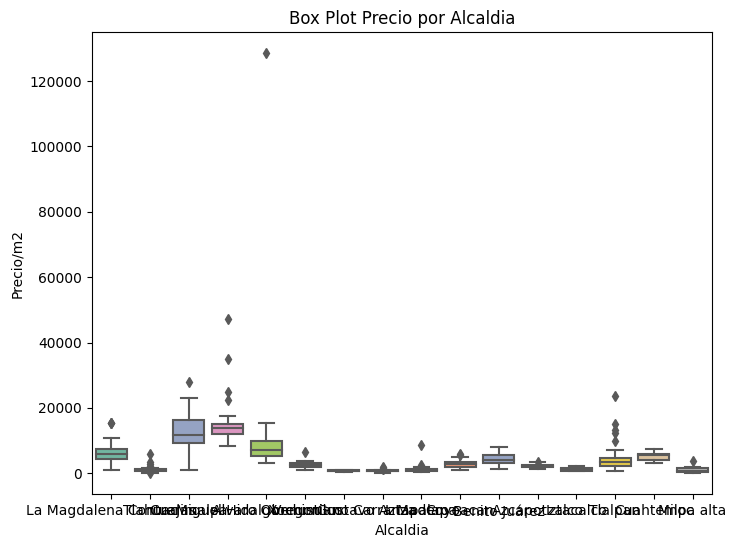

In [7]:
#visualizamos los datos:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alcaldia', y='Precio_m2', data=OWA1, palette='Set2')
plt.title('Box Plot Precio por Alcaldia')
plt.xlabel('Alcaldia')
plt.ylabel('Precio/m2')
plt.show()

In [8]:
#Prueba Post-Hoc
#para realizar comparaciones entre grupos
tukeyresultado1 = pairwise_tukeyhsd(OWA1['Precio_m2'], OWA1['Alcaldia'])
print("\nResultados Tukey-Kramer prueba Post Hoc:")
print(tukeyresultado1)


Resultados Tukey-Kramer prueba Post Hoc:
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
        group1                 group2           meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------------------
        Alvaro Obregon           Azcapotzalco  -6893.3365    0.0 -10877.0263  -2909.6467   True
        Alvaro Obregon          Benito Juárez  -4586.0375 0.0178  -8793.8823   -378.1927   True
        Alvaro Obregon               Coyoacan  -6286.1583    0.0  -9734.5505  -2837.7661   True
        Alvaro Obregon              Cuahtemoc  -3939.0954  0.084  -8085.8905    207.6998  False
        Alvaro Obregon             Cuajimalpa   4111.7277 0.1009   -304.4034   8527.8589  False
        Alvaro Obregon      Gustavo A. Madero  -8424.5208    0.0  -11334.329  -5514.7125   True
        Alvaro Obregon              Iztacalco  -7982.7885 0.0211 -15404.7291   -560.8478   Tru

# ANOVA 2 WAY

In [9]:
TWA = inmu.iloc[ : , [12,14,22]]

In [10]:
TWA["Amueblado"]=TWA["Amueblado"].replace("Si ","Si")
TWA["Amueblado"]=TWA["Amueblado"].replace("No ","No")


C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_11780\2781444394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWA["Amueblado"]=TWA["Amueblado"].replace("Si ","Si")
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_11780\2781444394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWA["Amueblado"]=TWA["Amueblado"].replace("No ","No")


In [11]:
# ANOVA de 2 vías.
formula = 'Precio_m2 ~ Cocina_equip + Amueblado'
modelo = ols(formula, data=TWA).fit()
tablANOVA = sm.stats.anova_lm(modelo, typ=2)

# Imprimimos los resultados
print("Resultados ANOVA de dos vías:")
print(tablANOVA)

Resultados ANOVA de dos vías:
                    sum_sq     df          F    PR(>F)
Cocina_equip  6.541440e+08    1.0  13.737245  0.000228
Amueblado     4.731502e+07    1.0   0.993631  0.319225
Residual      3.118998e+10  655.0        NaN       NaN


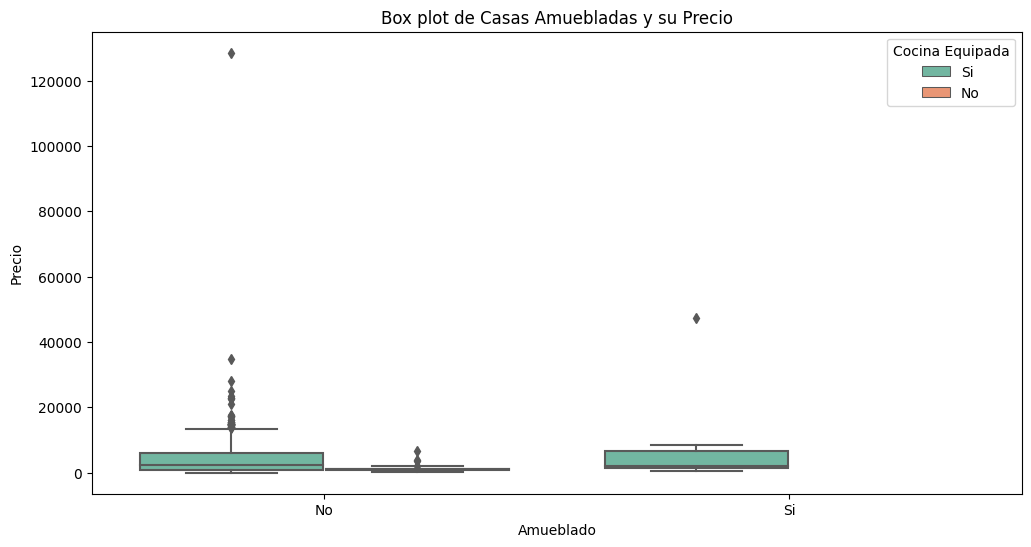

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Amueblado', y='Precio_m2', hue='Cocina_equip', data=TWA, palette='Set2')
plt.title('Box plot de Casas Amuebladas y su Precio')
plt.xlabel('Amueblado')
plt.ylabel('Precio')
plt.legend(title='Cocina Equipada')
plt.show()

In [13]:
# Realización de la prueba Post Hoc (Tukey HSD):
# Ambueblado
posthoc1 = pairwise_tukeyhsd(TWA['Precio_m2'], TWA['Amueblado'], alpha=0.05)
print("\nResultados de la prueba Tukey HSD para Inmuebles Amueblados:")
print(posthoc1)

# Para Cocina Equipada
posthoc2 = pairwise_tukeyhsd(TWA['Precio_m2'], TWA['Cocina_equip'], alpha=0.05)
print("\nResultados de la prueba Tukey HSD para Inmuebles con Cocina Equipada:")
print(posthoc2)


Resultados de la prueba Tukey HSD para Inmuebles Amueblados:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
    No     Si 2189.3093 0.2452 -1506.5787 5885.1973  False
----------------------------------------------------------

Resultados de la prueba Tukey HSD para Inmuebles con Cocina Equipada:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    No     Si 3460.5212 0.0002 1652.3946 5268.6478   True
---------------------------------------------------------
